In [6]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import pandas as pd

## Step 1.1 - How to create a Neural Network
To  create a neural network in Pytorch, you need to create a class that extends the torch.nn.Module

In [8]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class SineNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_layer_1 = nn.Linear(1, 3)
        self.hidden_layer_2 = nn.Linear(3, 3)

        self.output_layer = nn.Linear(3, 1)

    def forward(self, x):
        hidden_output = self.hidden_layer_1(x)
        hidden_output = F.relu(hidden_output)
        hidden_output = self.hidden_layer_2(hidden_output)
        hidden_output = F.relu(hidden_output)
        output = self.output_layer(hidden_output)
        return output   

## Step 1.2 How to make an prediction
PyTorch expects inputs to be a tensor of type float.

In [9]:
input_data = torch.tensor([1]).float()
actual_target = torch.tensor([np.sin(1)])
sine_network = SineNeuralNetwork()

prediction = sine_network(input_data)
print(f"Prediction: {prediction[0]}, Actual: {actual_target[0]}")

Prediction: 0.08890696614980698, Actual: 0.8414709848078965


## Task 1.1 - Create a Neural Network
You are tasked to create a fully connected neural network that has the following architecture:
- Input Layer: 1 neurons
- Hidden Layer: 3 neurons
- Output Layer: 1 neuron

![Network Structure](images/Network%20Structure.png)

In [10]:
# TODO Create a neural network 

## Task 1.2 - Make a prediction

In [11]:
# TODO: add your network and make a prediction here

## Step 2: How to train a Neural Network

100%|██████████| 10/10 [00:03<00:00,  2.66it/s]


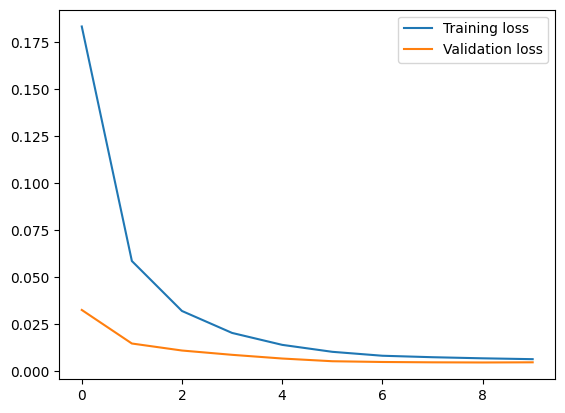

In [12]:
# Define the number of epochs
epochs = 10

# Generate some data
data = torch.randn(1000, 1)
labels = torch.sin(data)
train_validation_split = int(0.8 * len(data))

# Split the data into training and validation
train_input = data[:train_validation_split]
train_target = labels[:train_validation_split]

validation_input = data[train_validation_split:]
validation_target = labels[train_validation_split:]

# Create the model, loss function and optimizer
model = SineNeuralNetwork()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epoch_losses = []
validation_losses = []

# Train the model
for epoch in trange(epochs):

    epoch_loss = 0
    for input, target in zip(train_input, train_target):
    
        # Forward pass
        output = model(input)
        loss = criterion(output, target)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    
    epoch_losses.append(epoch_loss/len(train_input))
    

    # Calculate the validation loss for visualizing the model's performance
    validation_loss = 0
    for input, target in zip(validation_input, validation_target):
        output = model(input)
        loss = criterion(output, target)
        validation_loss += loss.item()
    
    validation_losses.append(validation_loss/len(validation_input))

# Plot the training and validation losses
plt.plot(epoch_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.legend()



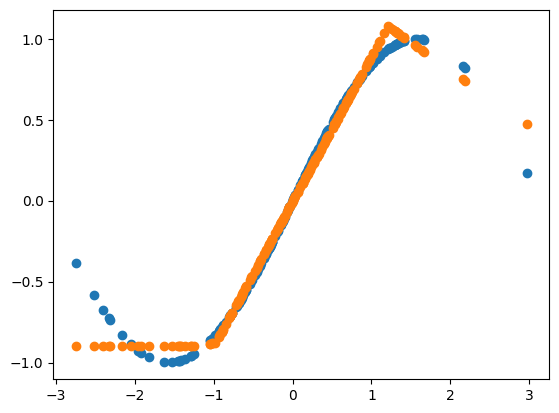

In [13]:
predictions = model(validation_input)
plt.scatter(validation_input, validation_target, label='True values')
plt.scatter(validation_input, predictions.detach().numpy(), label='Predictions')

## Task 2: Train the Neural Network
Try to improve the performance of the neural network by training it on the given dataset.

Recommended Steps:
* Try to change the number of epochs
* Try to change the learning rate
* Try to change the neural network architecture
  * Add more hidden layers
  * Add more neurons to the hidden layer

In [22]:
# TODO - Fill in the following values
epochs = 
learning_rate = 
model = # Your network here

100%|██████████| 10/10 [00:03<00:00,  2.70it/s]


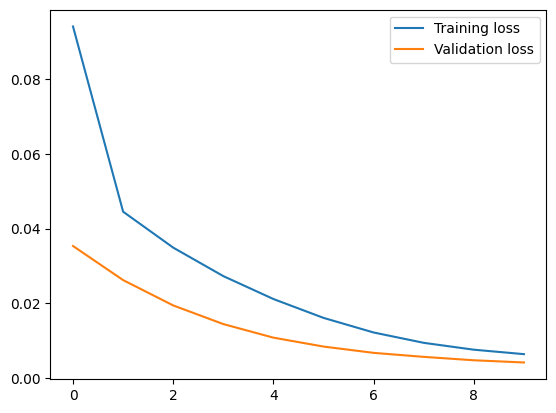

In [23]:
# DO NOT MODIFY THIS CELL

# Generate some data
data = torch.randn(1000, 1)
labels = torch.sin(data)
train_validation_split = int(0.8 * len(data))

# Split the data into training and validation
train_input = data[:train_validation_split]
train_target = labels[:train_validation_split]

validation_input = data[train_validation_split:]
validation_target = labels[train_validation_split:]

# Create the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


epoch_losses = []
validation_losses = []

# Train the model
for epoch in trange(epochs):

    epoch_loss = 0
    for input, target in zip(train_input, train_target):
    
        # Forward pass
        output = model(input)
        loss = criterion(output, target)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    
    epoch_losses.append(epoch_loss/len(train_input))
    

    # Calculate the validation loss for visualizing the model's performance
    validation_loss = 0
    for input, target in zip(validation_input, validation_target):
        output = model(input)
        loss = criterion(output, target)
        validation_loss += loss.item()
    
    validation_losses.append(validation_loss/len(validation_input))

# Plot the training and validation losses
plt.plot(epoch_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.legend()



## Step 3: How 

## Task 4: Competition
Now it is your turn to compete, join together with the people on your table and try to get the best performance on the dataset.

Your goal is to get the highest accuracy on the test dataset.
Try to improve the performance of the neural network by training it on the given dataset.

Recommended Steps:
* Try to change the number of epochs
* Try to change the learning rate
* Try to change the neural network architecture
  * Add more hidden layers
  * Add more neurons to the hidden layers
* Try to change the optimizer
* Try to change the loss function

In [21]:
# DO NOT CHANGE ANY CODE IN THIS CELL

# Load the data
data = pd.read_csv('data/winequality-red.csv')

# Split the data into input and target
target = data['quality']
data = data.drop('quality', axis=1)

# Convert the data to PyTorch tensors
data = torch.tensor(data.values).float()
target = torch.tensor(target.values).float()

# Split the data into training and validation
train_input = data[:train_validation_split]
train_target = target[:train_validation_split]

validation_input = data[train_validation_split:]
validation_target = target[train_validation_split:]


tensor([[ 7.4000,  0.7000,  0.0000,  ...,  3.5100,  0.5600,  9.4000],
        [ 7.8000,  0.8800,  0.0000,  ...,  3.2000,  0.6800,  9.8000],
        [ 7.8000,  0.7600,  0.0400,  ...,  3.2600,  0.6500,  9.8000],
        ...,
        [ 6.3000,  0.5100,  0.1300,  ...,  3.4200,  0.7500, 11.0000],
        [ 5.9000,  0.6450,  0.1200,  ...,  3.5700,  0.7100, 10.2000],
        [ 6.0000,  0.3100,  0.4700,  ...,  3.3900,  0.6600, 11.0000]])

In [ ]:
# TODO
# Create you model here

class CompetitionNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        pass

    def forward(self, x):
        pass

In [ ]:


epochs =
learning_rate =
model = 
criterion =
optimizer =


In [ ]:
epoch_losses = []
validation_losses = []

# Train the model
for epoch in trange(epochs):

    epoch_loss = 0
    for input, target in zip(train_input, train_target):
    
        # Forward pass
        output = model(input)
        loss = criterion(output, target)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    
    epoch_losses.append(epoch_loss/len(train_input))
    

    # Calculate the validation loss for visualizing the model's performance
    validation_loss = 0
    for input, target in zip(validation_input, validation_target):
        output = model(input)
        loss = criterion(output, target)
        validation_loss += loss.item()
    
    validation_losses.append(validation_loss/len(validation_input))

# Plot the training and validation losses
plt.plot(epoch_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.legend()

In [24]:
test = pd.read_csv('data/test.csv')
test_target = test['quality']
test_features = test.drop('quality', axis=1)
test_features = torch.tensor(test_features.values).float()
test_target = torch.tensor(test_target.values).float()

# Calculate the test loss
test_loss = 0
for input, target in zip(test_features, test_target):
    output = model(input)
    loss = criterion(output, target)
    test_loss += loss.item()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.400,0.18,1.6,0.079,24.0,58.0,0.99650,3.34,0.58,9.4,5
1,7.0,0.540,0.00,2.1,0.079,39.0,55.0,0.99560,3.39,0.84,11.4,6
2,6.4,0.530,0.09,3.9,0.123,14.0,31.0,0.99680,3.50,0.67,11.0,4
3,8.3,0.260,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,6
4,8.3,0.260,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
173,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
174,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
175,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
176,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
